In [36]:
pip install opencv-python


python(7847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


In [57]:
from PIL import Image
import numpy as np
from random import randint, random, sample
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Load target image
target_image = cv2.imread('target_image.jpg')
target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
height, width, _ = target_image.shape

In [68]:
# Parameters
POPULATION_SIZE = 10  # Smaller population for initial test
NUM_POLYGONS = 50
NUM_VERTICES = 5

import numpy as np
import cv2
import matplotlib.pyplot as plt
from random import randint, random
from sklearn.cluster import KMeans



# Extract a palette of colors from the target image
def extract_palette(image, num_colors=10):
    pixels = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    palette = kmeans.cluster_centers_
    return palette

palette = extract_palette(target_image, num_colors=10)
palette = palette.astype(int)
print("Extracted palette:", palette)



class Polygon:
    def __init__(self, palette):
        self.num_vertices = randint(3, 6)
        self.vertices = [(randint(0, width), randint(0, height)) for _ in range(self.num_vertices)]
        color = palette[randint(0, len(palette) - 1)]
        self.color = tuple(map(int, list(color) + [randint(50, 255)]))  # RGBA with random alpha

class Individual:
    def __init__(self, palette):
        self.palette = palette
        self.polygons = [Polygon(palette) for _ in range(NUM_POLYGONS)]



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracted palette: [[215 235 211]
 [ 25  28  39]
 [ 81 141 183]
 [ 33  62  98]
 [226 224 142]
 [ 91 114 112]
 [ 47  99 151]
 [136 190 210]
 [148 171 146]
 [216 191  67]]


Extracting the colors from target image

In [69]:
def extract_palette(image, num_colors=10):
    pixels = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    palette = kmeans.cluster_centers_
    return palette

# Extract a palette of colors from the target image
palette = extract_palette(target_image, num_colors=10)

# Convert palette to integer values
palette = palette.astype(int)
print("Extracted palette:", palette)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracted palette: [[ 33  62  98]
 [226 224 142]
 [ 91 114 113]
 [ 25  28  39]
 [137 190 210]
 [ 81 141 183]
 [ 47  99 151]
 [148 171 145]
 [215 235 211]
 [217 191  66]]


[139.32576405519444, 123.980879613791, 131.98012648724674, 128.3799321473372, 139.14178498118372, 129.21876306686434, 127.17359685635002, 134.39799768122552, 141.12992501995666, 137.32672625156803]


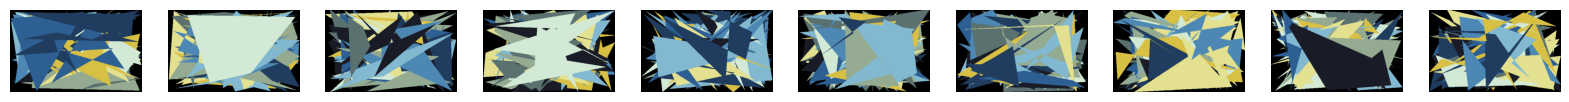

In [70]:
# Fitness function using Mean Absolute Error (MAE)
def fitness_mae(individual):
    generated_image = render_individual(individual)
    mae = np.mean(np.abs(generated_image - target_image))
    return mae

# Test fitness function on the initial population
fitness_scores_mae = [fitness_mae(individual) for individual in population]
print(fitness_scores_mae)

# Render and display initial population with colors from the palette
fig, axs = plt.subplots(1, POPULATION_SIZE, figsize=(20, 20))
for i in range(POPULATION_SIZE):
    axs[i].imshow(render_individual(population[i]))
    axs[i].axis('off')
plt.show()

Selection


In [61]:
from random import randint, choices

def probabilistic_tournament_selection(population, fitness_scores, tournament_size=3, maximize=False):
    selected_population = []
    for _ in range(len(population)):
        # Randomly select individuals for the tournament
        tournament = [randint(0, len(population) - 1) for _ in range(tournament_size)]
        # Get the fitness scores of the selected individuals
        tournament_fitness = [fitness_scores[i] for i in tournament]
        
        # Probabilistic selection
        probabilities = [1 / (1 + fitness) for fitness in tournament_fitness] if not maximize else tournament_fitness
        total_prob = sum(probabilities)
        probabilities = [prob / total_prob for prob in probabilities]
        winner_index = choices(tournament, weights=probabilities, k=1)[0]
        
        selected_population.append(population[winner_index])
    return selected_population

Crossover

In [71]:
import random

def two_point_crossover(parent1, parent2):
    assert len(parent1.polygons) == len(parent2.polygons)
    point1 = random.randint(1, len(parent1.polygons) - 2)
    point2 = random.randint(point1 + 1, len(parent1.polygons) - 1)
    offspring1_polygons = parent1.polygons[:point1] + parent2.polygons[point1:point2] + parent1.polygons[point2:]
    offspring2_polygons = parent2.polygons[:point1] + parent1.polygons[point1:point2] + parent2.polygons[point2:]
    offspring1 = Individual(parent1.palette)
    offspring2 = Individual(parent2.palette)
    offspring1.polygons = offspring1_polygons
    offspring2.polygons = offspring2_polygons
    return offspring1, offspring2

def arithmetic_crossover(parent1, parent2):
    alpha = random.random()
    offspring_polygons = [
        Polygon(
            palette=parent1.palette,
            vertices=[
                (int(alpha * v1[0] + (1 - alpha) * v2[0]), int(alpha * v1[1] + (1 - alpha) * v2[1]))
                for v1, v2 in zip(p1.vertices, p2.vertices)
            ],
            color=tuple(
                int(alpha * c1 + (1 - alpha) * c2) for c1, c2 in zip(p1.color, p2.color)
            ),
        )
        for p1, p2 in zip(parent1.polygons, parent2.polygons)
    ]
    offspring = Individual(parent1.palette)
    offspring.polygons = offspring_polygons
    return offspring, offspring


In [63]:
pip install genetic_algorithms


python(11389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


mUTATION

In [64]:
def basic_mutation(individual, mutation_rate=0.01):
    for polygon in individual.polygons:
        if random.random() < mutation_rate:
            # Mutate color
            polygon.color = tuple(random.randint(0, 255) for _ in range(4))
        if random.random() < mutation_rate:
            # Mutate vertices
            polygon.vertices = [(random.randint(0, individual.width), random.randint(0, individual.height)) for _ in range(len(polygon.vertices))]


In [72]:
def run_genetic_algorithm(target_image, palette, population_size, num_polygons, num_generations, crossover_method, mutation_method, elitism, selection_method, selection_kwargs):
    height, width, _ = target_image.shape
    population = [Individual(palette) for _ in range(population_size)]

    fitness_landscape = []

    for generation in range(num_generations):
        fitness_scores = [fitness_mae(individual) for individual in population]

        if elitism:
            best_individuals = sorted(population, key=lambda ind: fitness_mae(ind))[:int(0.1 * population_size)]
        else:
            best_individuals = []

        selected_population = selection_method(population, fitness_scores, **selection_kwargs)

        next_generation = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1 if i + 1 < len(selected_population) else 0]
            if crossover_method == 'two_point':
                offspring1, offspring2 = two_point_crossover(parent1, parent2)
            next_generation.extend([offspring1, offspring2])

        for individual in next_generation:
            if mutation_method == 'basic':
                basic_mutation(individual)

        if elitism:
            next_generation = next_generation[:population_size - len(best_individuals)] + best_individuals

        population = next_generation
        best_individual = min(population, key=lambda ind: fitness_mae(ind))
        fitness_landscape.append(fitness_mae(best_individual))

    return best_individual, fitness_landscape


In [73]:
import json
import pandas as pd
from time import time

def run_experiment(configurations, target_image_path, num_runs=30, output_file='experiment_results.json'):
    try:
        with open(output_file, 'r') as f:
            results = json.load(f)
    except FileNotFoundError:
        results = []

    target_image = cv2.imread(target_image_path)
    target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)
    palette = extract_palette(target_image, num_colors=10).astype(int)

    for config in configurations:
        config_name = config['name']
        existing_config = next((res for res in results if res['configuration']['name'] == config_name), None)
        if existing_config:
            config_results = existing_config
        else:
            config_results = {'configuration': config, 'fitness_scores': [], 'fitness_landscape': []}
            results.append(config_results)

        start_run = len(config_results['fitness_scores'])
        for run in range(start_run, num_runs):
            print(f"Running configuration {config['name']}, run {run + 1}/{num_runs}")

            start_time = time()
            best_individual, fitness_landscape = run_genetic_algorithm(
                target_image=target_image,
                palette=palette,
                population_size=config['population_size'],
                num_polygons=NUM_POLYGONS,
                num_generations=config['num_generations'],
                crossover_method=config['crossover_method'],
                mutation_method=config['mutation_method'],
                elitism=config['elitism'],
                selection_method=probabilistic_tournament_selection,
                selection_kwargs=config.get('selection_kwargs', {})
            )
            end_time = time()

            fitness_score = fitness_mae(best_individual)
            config_results['fitness_scores'].append(fitness_score)
            config_results['fitness_landscape'].append(fitness_landscape)

            print(f"Run {run + 1} completed in {end_time - start_time:.2f} seconds with fitness score: {fitness_score}")

            with open(output_file, 'w') as f:
                json.dump(results, f, indent=4)

    return results


In [74]:
# Define the configurations
experiments = [
    {
        'name': 'Two-Point Crossover',
        'population_size': 100,
        'num_generations': 300,
        'crossover_method': 'two_point',
        'mutation_method': 'basic',
        'elitism': True,
        'selection_kwargs': {'tournament_size': 3, 'maximize': False}
    }
    # Add more configurations as needed
]

# Run the experiments
results = run_experiment(
    configurations=experiments,
    target_image_path='target_image.jpg',
    num_runs=30,
    output_file='experiment_results.json'
)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Running configuration Two-Point Crossover, run 1/30


AttributeError: 'Individual' object has no attribute 'width'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fitness_landscape(results):
    for result in results:
        fitness_landscapes = result['fitness_landscape']
        avg_fitness = np.mean(fitness_landscapes, axis=0)
        std_fitness = np.std(fitness_landscapes, axis=0)
        
        generations = range(len(avg_fitness))
        
        plt.plot(generations, avg_fitness, label=result['configuration']['name'])
        plt.fill_between(generations, avg_fitness - std_fitness, avg_fitness + std_fitness, alpha=0.2)

    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Fitness Landscape Across Generations')
    plt.legend()
    plt.show()

plot_fitness_landscape(results)

# Statistical analysis
def analyze_results(results):
    for result in results:
        config_name = result['configuration']['name']
        fitness_scores = result['fitness_scores']
        
        mean_fitness = np.mean(fitness_scores)
        std_fitness = np.std(fitness_scores)
        
        print(f"Configuration: {config_name}, Mean Fitness: {mean_fitness:.2f}, Std Dev: {std_fitness:.2f}")

analyze_results(results)


In [ ]:
def save_results_to_dataframe(results, output_csv='experiment_results.csv'):
    rows = []
    for result in results:
        config_name = result['configuration']['name']
        for i, fitness_score in enumerate(result['fitness_scores']):
            rows.append({'Experiment': config_name, 'Run': i + 1, 'Fitness': fitness_score})
    
    df = pd.DataFrame(rows)
    df.to_csv(output_csv, index=False)

save_results_to_dataframe(results)
